___
# Atividade: Soma de variáveis aleatórias 

### <font color="red">Victor Hugo Leal Vieira da Silva e Eduardo Tirta</font>
___

## Aula 17

**Preparo Prévio:**
1. Seção 5.1 – págs 137 a 140: aborda como fazer uma distribuição de probabilidade conjunta entre duas variáveis aleatórias X e Y e define função de probabilidade conjunta.
2. Seção 5.2 – págs 146 a 149; págs 156 e 157 (Exemplo 5.12) e págs 158 a 162 (Exemplo 5.13): aborda propriedades de esperança e variância em soma de variáveis aleatórias (X+Y). 

**Hoje:**
1. Descrever as propriedades de distribuição conjunta entre duas variáveis aleatórias discretas.
2. Compreender correlação entre variáveis aleatórias.
3. Descrever as propriedades de esperança e variância para soma de variáveis aleatórias (discretas e contínuas).


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 234 a 240).
___

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

___
## <font color='blue'>Exercício 1 - Exemplo 3 da Aula 17 </font>

Num determinado momento em um certo país, a taxa de juros ($X$) pode variar 0,25 pontos percentuais (pp), para cima ou para baixo, ou manter-se constante. 
Já a taxa de câmbio ($Y$) pode variar para mais ou para menos em 1 pp, ou manter-se constante.
A tabela seguinte reflete as distribuições marginais e conjunta dessas duas taxas representadas, aqui, por $X$ e $Y$. 

![Tabela](XeY.png)

Um investidor aplica a mesma quantia num fundo que acompanha a variação da taxa de juros ($X$) e num fundo que acompanha a variação cambial ($Y$). Ao final do dia ele resgatará seu investimento.
1. Encontre a $E(X)$, $Var(X)$, $E(Y)$, $Var(Y)$, $Cov(X,Y)$ e $Corr(X,Y)$.
2. Construa a distribuição de probabilidades do ganho (em variação %) desse investidor, ou seja, encontre todos os valores de $G=0.5*X+0.5*Y$, sendo $G$ o ganho do investidor aplicando metade do dinheiro em $X$ e metade do dinheiro em $Y$. 
3. Calcule esperança e variância de $G$ utilizando a distribuição de probabilidade, ou seja, $E(G)$ e $Var(G)$.
4. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.


In [3]:
#Valores da tabela
y=[-1,0,1] #colunas
x=[-0.25,0,0.25] #linhas
probXY=[[[] for i in range(3)] for i in range(3)]
pxy=[0.05,0.07,0.26,0.075,0.21,0.12,0.125,0.07,0.02]
k=0
for i in range(3):
    for j in range(3):
        probXY[i][j]=pxy[k]
        k+=1
print(probXY)

[[0.05, 0.07, 0.26], [0.075, 0.21, 0.12], [0.125, 0.07, 0.02]]


In [4]:
#item 1 
#Distribuição de X
probX=[0,0,0]
for i in range(3):
    for j in range(3):
        probX[i]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de X=",x[i]," é igual a ", probX[i])

espX=0
varX=0
for i in range(3):
    espX+=x[i]*probX[i]
for i in range(3):
    varX+=(x[i]-espX)**2*probX[i]
print("Esperança de X=",espX)
print("Variância de X=",varX)


Probabilidade de X= -0.25  é igual a  0.38
Probabilidade de X= 0  é igual a  0.40499999999999997
Probabilidade de X= 0.25  é igual a  0.215
Esperança de X= -0.04125
Variância de X= 0.0354859375


In [5]:
#item 1 
#Distribuição de Y
probY=[0,0,0]
for i in range(3):
    for j in range(3):
        probY[j]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de Y=",y[i]," é igual a ", probY[i])

espY=0
varY=0
for i in range(3):
    espY+=y[i]*probY[i]
for i in range(3):
    varY+=(y[i]-espY)**2*probY[i]
print("Esperança de Y=",espY)
print("Variância de Y=",varY)


Probabilidade de Y= -1  é igual a  0.25
Probabilidade de Y= 0  é igual a  0.35000000000000003
Probabilidade de Y= 1  é igual a  0.4
Esperança de Y= 0.15000000000000002
Variância de Y= 0.6275


In [6]:
#item 1
#Covariância e Correlação
cov=0
for i in range(3):
    for j in range(3):
        cov+=(x[i]-espX)*(y[j]-espY)*probXY[i][j]

corr=cov/(varX*varY)**(0.5)
print("Covariância entre X e Y=", cov)
print("Correlação entre X e Y=", corr)


Covariância entre X e Y= -0.07256249999999999
Correlação entre X e Y= -0.4862697238590869


In [7]:
#item 2
#Distribuição do G=0.5*X +0.5*Y
g=[]
probG=[]
for i in range(3):
    for j in range(3):
        a = 0.5*x[i]+0.5*y[j]
        if a in g:
            probG[g.index(a)] += probX[i][j]
        else:
            g.append(a)         
            probG.append(probXY[i][j])

for i in range(len(g)):
    print("Probabilidade de G=",g[i]," é igual a ", probG[i])


Probabilidade de G= -0.625  é igual a  0.05
Probabilidade de G= -0.125  é igual a  0.07
Probabilidade de G= 0.375  é igual a  0.26
Probabilidade de G= -0.5  é igual a  0.075
Probabilidade de G= 0.0  é igual a  0.21
Probabilidade de G= 0.5  é igual a  0.12
Probabilidade de G= -0.375  é igual a  0.125
Probabilidade de G= 0.125  é igual a  0.07
Probabilidade de G= 0.625  é igual a  0.02


In [8]:
#item 3
#Esperança e variância de G
espG=0
varG=0
for i in range(len(g)):
    espG+=g[i]*probG[i]
for i in range(len(g)):
    varG+=(g[i]-espG)**2*probG[i]

print("Esperança e variância de G usando distribuição de probabilidade de G:")
print("Esperança de G=",espG)
print("Variância de G=",varG)

Esperança e variância de G usando distribuição de probabilidade de G:
Esperança de G= 0.05437500000000001
Variância de G= 0.12946523437500002


In [9]:
#item 4
#Esperança e variância de G usando propriedades de soma de variáveis aleatórias

#G=0.5X + 0.5Y
#G=0.5*(X+Y)

espGp = 0.5*(espX+espY)
varGp = 0.5**2*(varX+varY+2*cov)

print("Esperança e variância de G usando propriedades:")
print("Esperança de G=",espGp)
print("Variância de G=",varGp)


Esperança e variância de G usando propriedades:
Esperança de G= 0.05437500000000001
Variância de G= 0.129465234375


<img src="Exercicio1.jpeg">

___
## <font color='blue'>Exercício 2 - Soma de normais correlacionadas</font>

Um pacote com mil peças de resistor de carbono 1/8w tem o preço distribuído como uma normal com média 21 reais e desvio padrão de 2 reais, ou seja, $X$~$N(21;4)$.

Já jumpers/fios macho-fêmea com 40 unidades de 20 cm tem o preço distribuído como uma normal com média 18,90 reais e desvio padrão de 1,50 reais, ou seja, $Y$~$N(18,90;2,25)$.

Assuma que a correlação entre esses dois preços seja de 0,85.

1. Simule $n=100$, $n=1.000$ e $n=10.000$ de cada variáveis aleatória respeitando a correlação entre elas. Para tanto, consulte o comando `np.random.multivariate_normal(mean, cov, n)`. 
2. Se você vai passear na Santa Efigênia para comprar um pacote de cada um, calcule a esperança e a variância do gasto $G=X+Y$ com a compra de uma pacotinho de resistores e um jumper nas especificações acima descritos. 
3. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.
4. Construa a distribuição do gasto e verifique se o gasto se assemelha a distribuição normal.
5. Repita assumindo correlação igual a zero entre X e Y.


### Para correlação XY = 0.85

In [30]:
#Informações do enunciado
muX = 21
varX = 4
muY = 18.90
varY = 2.25
corXY = 0.85
covXY = corXY*(varX*varY)**(0.5)
mean = [muX, muY]
cov = [[varX, covXY], [covXY, varY]]  # diagonal covariance

In [11]:
#item 1
n=100
for i in range(0,3):
    G = 0
    x, y = np.random.multivariate_normal(mean, cov, n).T
    print("Matriz de covariâncias a partir dos n ({0}) valores correlacionados:".format(n))
    print(np.cov(x,y))
    n*=10

Matriz de covariâncias a partir dos n (100) valores correlacionados:
[[ 4.27813193  2.76548185]
 [ 2.76548185  2.38175369]]
Matriz de covariâncias a partir dos n (1000) valores correlacionados:
[[ 3.81396875  2.45370544]
 [ 2.45370544  2.21204508]]
Matriz de covariâncias a partir dos n (10000) valores correlacionados:
[[ 3.92511844  2.51955113]
 [ 2.51955113  2.23834838]]


In [12]:
#item 2
n=100

ListMeanG = list()
ListVarG = list()
ListaGzao = list()

for i in range(0,3):
    listG = list()
    x, y = np.random.multivariate_normal(mean, cov, n).T
    for i in range(len(x)): # Para média:
        WTF = x[i] + y[i]
        listG.append(WTF)
    ListaGzao.append(listG)
    MeanG = np.mean(listG)
    ListMeanG.append(MeanG)
    print("Média do Gasto com n= {1} : {0}".format(MeanG, n))
    VarG = 0
    for i in range(len(x)): # Para variância:
        VarG += ((listG[i] - MeanG)**2)
    ListVarG.append(VarG/n)
    print ("Variância para n= {0}: {1} \n".format(n,VarG/n))
    n*=10

Média do Gasto com n= 100 : 40.01546563258284
Variância para n= 100: 7.995171229358167 

Média do Gasto com n= 1000 : 39.82941719078883
Variância para n= 1000: 11.209084281489588 

Média do Gasto com n= 10000 : 39.88858694582507
Variância para n= 10000: 11.052573500662566 



In [13]:
#item 3
# Media de soma é a soma das médias
# Variancia da soma é soma das variâncias + 2*correlação
MeanG = muX + muY
VarG = varX + varY + 2*covXY
print("Média: {0}".format(MeanG))
print("Variância: {0}".format(VarG))

Média: 39.9
Variância: 11.35


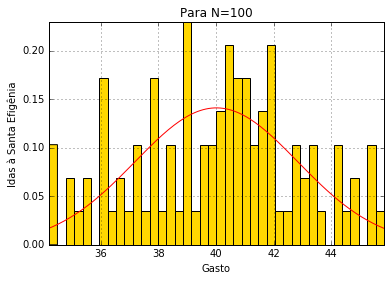

In [14]:
#item 4 parte 1
t = np.linspace(20,60,400)
plt.hist(ListaGzao[0],bins=40, normed = 1, color = "gold")
plt.grid(True)
plt.axis([min(ListaGzao[0]),max(ListaGzao[0]),0.00,0.23])
plt.title("Para N=100")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[0],scale=(ListVarG[0]**(1/2))), color = "red")
plt.show()

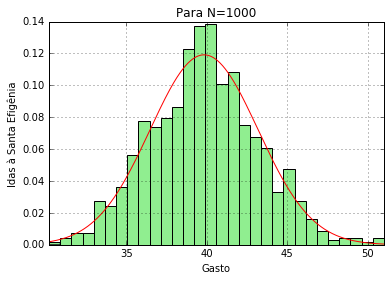

In [15]:
#item 4 parte 2
t = np.linspace(20,60,1000)
plt.hist(ListaGzao[1],bins=30, normed = 1, color = "lightgreen")
plt.grid(True)
plt.axis([min(ListaGzao[1]),max(ListaGzao[1]),0.00,0.14])
plt.title("Para N=1000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[1],scale=(ListVarG[1]**(1/2))), color = "red")
plt.show()

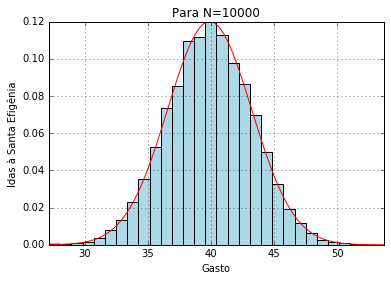

In [16]:
#item 4 parte 3
t = np.linspace(20,60,1000)
plt.hist(listG,bins=30, normed = 1, color = "lightblue")
plt.grid(True)
plt.axis([min(listG),max(listG),0.00,0.12])
plt.title("Para N=10000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[2],scale=(ListVarG[2]**(1/2))), color = "red")
plt.show()

### Para correlação XY= 0 

In [17]:
#Informações do enunciado
muX = 21
varX = 4
muY = 18.90
varY = 2.25
corXY = 0
covXY = corXY*(varX*varY)**(0.5)
mean = [muX, muY]
cov = [[varX, covXY], [covXY, varY]]  # diagonal covariance

In [18]:
#item 1
n=100
for i in range(0,3):
    G = 0
    x, y = np.random.multivariate_normal(mean, cov, n).T
    print("Matriz de covariâncias a partir dos n ({0}) valores correlacionados:".format(n))
    print(np.cov(x,y))
    n*=10

Matriz de covariâncias a partir dos n (100) valores correlacionados:
[[ 3.23017884  0.5451697 ]
 [ 0.5451697   2.45616682]]
Matriz de covariâncias a partir dos n (1000) valores correlacionados:
[[ 3.78174742 -0.14149862]
 [-0.14149862  2.15946445]]
Matriz de covariâncias a partir dos n (10000) valores correlacionados:
[[ 3.93514193  0.03249115]
 [ 0.03249115  2.27493815]]


In [19]:
#item 2
n=100

ListMeanG = list()
ListVarG = list()
ListaGzao = list()

for i in range(0,3):
    listG = list()
    x, y = np.random.multivariate_normal(mean, cov, n).T
    for i in range(len(x)): # Para média:
        WTF = x[i] + y[i]
        listG.append(WTF)
    ListaGzao.append(listG)
    MeanG = np.mean(listG)
    ListMeanG.append(MeanG)
    print("Média do Gasto com n= {1} : {0}".format(MeanG, n))
    VarG = 0
    for i in range(len(x)): # Para variância:
        VarG += ((listG[i] - MeanG)**2)
    ListVarG.append(VarG/n)
    print ("Variância para n= {0}: {1} \n".format(n,VarG/n))
    n*=10

Média do Gasto com n= 100 : 39.98729300214558
Variância para n= 100: 4.811164945976669 

Média do Gasto com n= 1000 : 39.89920645387287
Variância para n= 1000: 6.3059127187773285 

Média do Gasto com n= 10000 : 39.935509761594105
Variância para n= 10000: 6.246627805493202 



In [20]:
#item 3
# Media de soma é a soma das médias
# Variancia da soma é soma das variâncias + 2*correlação
MeanG = muX + muY
VarG = varX + varY
print("Média: {0}".format(MeanG))
print("Variância: {0}".format(VarG))

Média: 39.9
Variância: 6.25


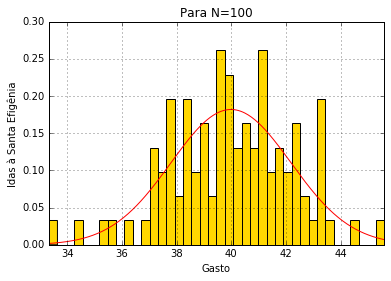

In [21]:
#item 4 parte 1
t = np.linspace(20,60,1000)
plt.hist(ListaGzao[0],bins=40, normed = 1, color = "gold")
plt.grid(True)
plt.axis([min(ListaGzao[0]),max(ListaGzao[0]),0.00,0.3])
plt.title("Para N=100")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[0],scale=(ListVarG[0]**(1/2))), color = "red")
plt.show()

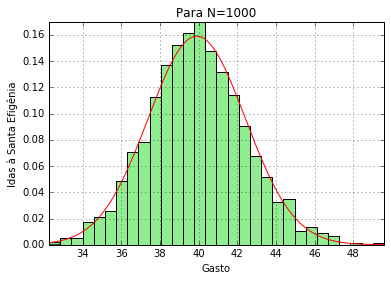

In [22]:
#item 4 parte 2
t = np.linspace(20,60,1000)
plt.hist(ListaGzao[1],bins=30, normed = 1, color = "lightgreen")
plt.grid(True)
plt.axis([min(ListaGzao[1]),max(ListaGzao[1]),0.00,0.17])
plt.title("Para N=1000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[1],scale=(ListVarG[1]**(1/2))), color = "red")
plt.show()

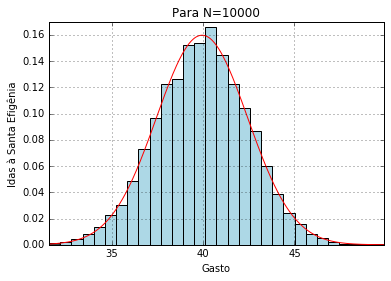

In [23]:
#item 4 parte 3
t = np.linspace(20,60,1000)
plt.hist(listG,bins=30, normed = 1, color = "lightblue")
plt.grid(True)
plt.axis([min(listG),max(listG),0.00,0.17])
plt.title("Para N=10000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=ListMeanG[2],scale=(ListVarG[2]**(1/2))), color = "red")
plt.show()